In [62]:
import pandas as pd
import ast
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [57]:
df = pd.read_csv("movies_metadata.csv")
df2 = pd.read_csv("credits.csv")
df2.head()

C:\Users\ana clara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [58]:
from collections import defaultdict
atores = defaultdict(int)
for e in df2.index:
    data_dict = ast.literal_eval(df2["cast"][e])
    for palavras in data_dict:
        nome = palavras['name']
        atores[nome] += 1
#atores

In [59]:
ser_atores = pd.Series(atores)

In [60]:
ser_atores = ser_atores[ser_atores > 28].sort_values(ascending=False)

In [63]:
df_filmes_atores = pd.DataFrame(index=df2.index, columns=ser_atores.index, dtype=np.uint8)
for e in df2.index:
    data_dict = ast.literal_eval(df2["cast"][e])
    for palavras in data_dict:
        nome = palavras['name']
        if nome in df_filmes_atores.columns:
            df_filmes_atores[nome][e] = 1
#atores

In [64]:
df_filmes_atores[df_filmes_atores != 1] = 0
df_filmes_atores

,Bess Flowers,Christopher Lee,John Wayne,Samuel L. Jackson,Gérard Depardieu,Michael Caine,John Carradine,Donald Sutherland,Jackie Chan,Frank Welker,...,Syd Saylor,George Raft,Quentin Tarantino,Paul Winfield,Emilio Estevez,Chow Yun-fat,Chazz Palminteri,Carmen Electra,Olaf Hytten,Walter Gotell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#pprint(data_dict)

In [5]:
# data_dict[1]['name']

In [6]:
df['original_title'].head()


0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: original_title, dtype: object

In [7]:
df.drop_duplicates(subset ="original_title", 
                     keep = 'first', inplace = True) 
df["original_title"].value_counts().value_counts()


1    43373
Name: original_title, dtype: int64

In [8]:
df['bilhao'] = df.revenue > 1e9

In [16]:
df_0 = df[df['revenue'] > 0]
df_budget = df_0[df_0['budget'] != '0']
df_clean = df_budget[df_budget['production_companies'] != '[]']
df_super_clean = df_clean[df_clean['genres'] != '[]']
df_super_clean.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,bilhao
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,False
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,False
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,False
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,False
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,False


In [14]:
df_mega_clean = df_super_clean[["id","genres","budget","revenue","production_companies"]]
df_mega_clean['budget'] = df_mega_clean['budget'].astype(float)
df_mega_clean.head()

C:\Users\ana clara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,genres,budget,revenue,production_companies
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...
5,949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {..."
8,9091,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,64350171.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."


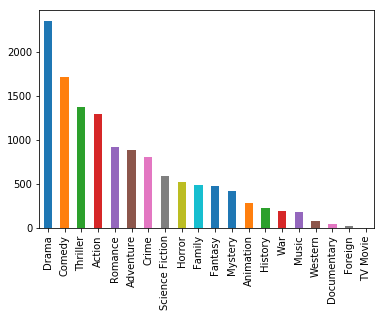

In [32]:
generos = []
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        generos.append(palavras['name'])

#df_generos = pd.DataFrame(generos)
#df_generos
#geneross = df_generos[0].value_counts()
#geneross
geneross.plot(kind='bar')


In [49]:
contador_drama = []
contador_comedia = []
contador_thriller = []
contador_acao = []
contador_romance = []
contador_aventura = []
contador_crime = []
contador_ciencia = []
contador_terror = []
contador_familia = []
contador_fantasia = []
contador_misterio = []
contador_animacao = []
contador_historia = []
contador_guerra = []
contador_musica = []
contador_faroeste = []
contador_documentario = []
contador_estrangeiro = []
contador_tv = []

In [52]:
categorias = ['Drama','Comedy','Thriller','Action','Romance','Adventure','Crime','Science Fiction','Horror','Family','Fantasy','Mystery','Animation','History',"War",'Music','Western','Documentary','Foreign','TV Movie']

for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        #print(palavras)
        if palavras["name"] == 'Drama':
            contador_drama.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Comedy':
            contador_comedia.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Thriller':
            contador_thriller.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Action':
            contador_acao.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Romance':
            contador_romance.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Adventure':
            contador_aventura.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Crime':
            contador_crime.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Science Fiction':
            contador_ciencia.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Horror':
            contador_terror.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Family':
            contador_familia.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Fantasy':
            contador_fantasia.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Mystery':
            contador_misterio.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Animation':
            contador_animacao.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'History':
            contador_historia.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'War':
            contador_guerra.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Music':
            contador_musica.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Western':
            contador_faroeste.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Documentary':
            contador_documentario.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'Foreign':
            contador_estrangeiro.append(df_mega_clean['revenue'][e])
        if palavras["name"] == 'TV Movie':
            contador_tv.append(df_mega_clean['revenue'][e])  


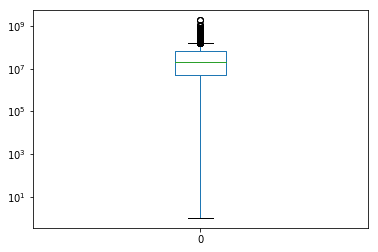

In [54]:
df_drama = pd.DataFrame(contador_drama)
df_drama.plot.box(logy=True)

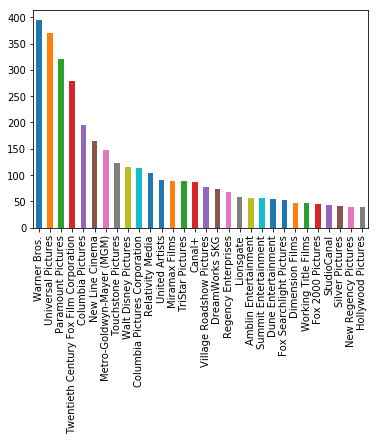

In [12]:
produtoras = []
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["production_companies"][e])
  #  print(data_dict)
    for palavras in data_dict:
        produtoras.append(palavras['name'])

df_produtoras = pd.DataFrame(produtoras)
df_produtoras
produtorass = df_produtoras[0].value_counts().head(30)
produtorass
produtorass.plot(kind='bar')

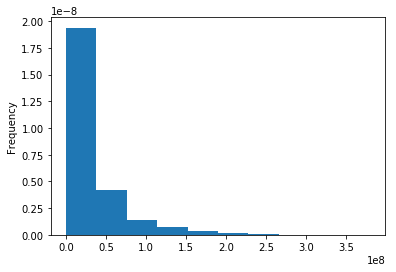

In [13]:
df_mega_clean.budget.plot.hist(density = True)

# Random Forest

# One Hot Encoder